# Apply the model to a dataset and inspect predictions

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd

Load the two csv files and create the two datasets (with simulated and reale data)

In [2]:
filename = 'simulatoReduced.csv'
names=['category','mva','nBJets','nJets','nLeptons','jetEta_0','jetEta_1','jetEta_2','jetEta_3','jetEta_4',\
      'jetMass_0','jetMass_1','jetMass_2','jetMass_3','jetMass_4','jetMassSoftDrop_0','jetMassSoftDrop_1',\
      'jetMassSoftDrop_2','jetMassSoftDrop_3','jetMassSoftDrop_4',\
       'jetPhi_0','jetPhi_1','jetPhi_2','jetPhi_3','jetPhi_4',\
      'jetPt_0','jetPt_1','jetPt_2','jetPt_3','jetPt_4','jetTau1_0','jetTau1_1','jetTau1_2','jetTau1_3','jetTau1_4',\
      'jetTau2_0','jetTau2_1','jetTau2_2','jetTau2_3','jetTau2_4','jetTau3_0','jetTau3_1','jetTau3_2',\
      'jetTau3_3','jetTau3_4','triggerBit_0','triggerBit_1','triggerBit_2','triggerBit_3','triggerBit_4',\
      'triggerBit_5','triggerBit_6','triggerBit_7','triggerBit_8','triggerBit_9']
data_SIM = read_csv(filename, names=names)

In [3]:
filename = 'reale3.5.csv'
data = read_csv(filename, names=names)

In [4]:
row_list=[]
for index, row in data_SIM.iterrows():
    if data_SIM['triggerBit_2'][index]==1 and data_SIM['nJets'][index]>=2 and \
    data_SIM['jetPt_0'][index]>400 and data_SIM['jetPt_1'][index]>400 and data_SIM['nLeptons'][index]==0 and data_SIM['category'][index]==1:
        row_list.append(row.tolist())
print ("SIM_test -> ", len(row_list))
SIM_test = pd.DataFrame(row_list,columns=names)

('SIM_test -> ', 113924)


In [36]:
row_list=[]
for index, row in data.iterrows():
    if data['triggerBit_2'][index]==1 and data['nJets'][index]>=2 and \
    data['jetPt_0'][index]>400 and data['jetPt_1'][index]>400 and data['nLeptons'][index]==0 and \
    data['category'][index]==1:
        row_list.append(row.tolist())
print ("dati_test -> ", len(row_list))
dati_test = pd.DataFrame(row_list,columns=names)

('dati_test -> ', 175399)


Load the model and apply it to the csv file with simulated data. Then add the prediction as a new column of the csv, named "prediction".

In [289]:
from pickle import load
# load the model from disk
simulato=SIM_test
#simulato=simulato.drop('mva', axis=1)
simulato=simulato.drop('category', axis=1)
simulato=simulato.drop('nBJets', axis=1)
#simulato['target']=np.ones(len(simulato['category']))
simulato

array=simulato.values
X = array[:, :-10]
#da= pd.DataFrame(X)
#da
filename = 'finalized_model_pickle_mva.sav'
loaded_model = load(open(filename,'rb'))
result = loaded_model.predict(X)
simulato['prediction']=result

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Do some test to verify how are the predictions and what's the behaviour of mva compared to prediction

In [268]:
err=0
for i in range(0,len(simulato['prediction'])):
    if simulato['prediction'][i]==0:
        err+=1
print err
print len(simulato['prediction'])-err

21886
92038


In [205]:
eff_ML=1-err/float(len(SIM_test['mva']))
print eff_ML
segnale=0
fondo=0
for i in range(0,len(SIM_test['mva'])):
    if SIM_test['mva'][i]>0.428798:
        segnale+=1
    else:
        fondo+=1
eff_mva=segnale/float(len(SIM_test['mva']))
print eff_mva
print segnale

0.861811383027
0.809048137355
92170


In [189]:
uguale=0
for i in range(0,len(simulato['prediction'])):
    if simulato['prediction'][i]==0 and SIM_test['mva'][i]<0.9:
        uguale+=1
print uguale

21835


In [200]:
contatore=0
for i in range(0,len(dati_test['mva'])):
    if dati_test['mva'][i]>0.9:
        contatore+=1
print contatore
print contatore/float(len(dati_test['mva']))

4176
0.0238085735951


Load the model and apply it to the csv file with real data. Then add the prediction as a new column of the csv, named "prediction".

In [290]:
from pickle import load
# load the model from disk
reale=dati_test
#reale=reale.drop('mva', axis=1)
reale=reale.drop('category', axis=1)
reale=reale.drop('nBJets', axis=1)
#simulato['target']=np.ones(len(simulato['category']))

array=reale.values
X = array[:, :-10]
#da= pd.DataFrame(X)
#da
filename = 'finalized_model_pickle_mva.sav'
loaded_model = load(open(filename,'rb'))
results = loaded_model.predict(X)
reale['prediction']=results

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Do other tests

In [113]:
err=0
for i in range(0,len(reale['prediction'])):
    if reale['prediction'][i]==1:
        err+=1
print err
print err/float(len(reale['prediction']))

49729
0.283519290304


In [174]:
uguale=0
for i in range(0,len(reale['prediction'])):
    if reale['prediction'][i]==0 and dati_test['mva'][i]<0.9:
        uguale+=1
print uguale

125522


Use ROOT to plot mva and prediction==1 events

In [236]:
import ROOT
from ROOT import TCanvas, TH1F, TLegend, TPad

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: original mva (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mva after ML (Potential memory leak).


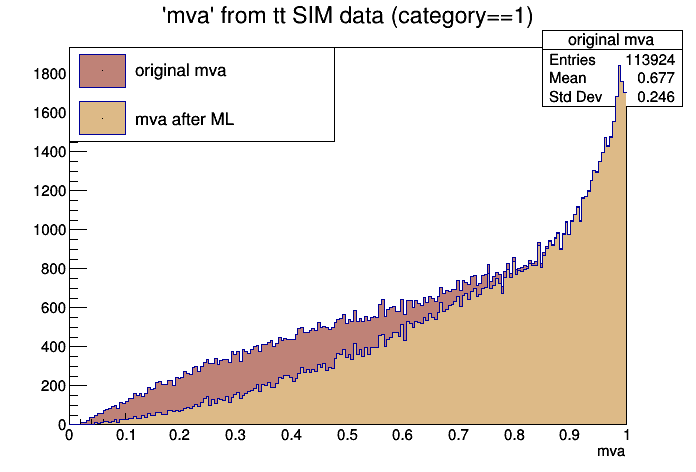

In [295]:
c = TCanvas("c1","c1")
histo=TH1F("original mva","mva", 200, 0, 1)
histo.SetTitle("'mva' from tt SIM data (category==1)");
histo.GetXaxis().SetTitle("mva");
histo2=TH1F("mva after ML","mva", 200, 0, 1)
for index, row in SIM_test.iterrows():
    histo.Fill(row['mva'])
histo.SetFillColor( 45 )
histo.Draw()
for i in range(0,len(simulato['prediction'])):
    if simulato['prediction'][i]==1:
        histo2.Fill(SIM_test['mva'][i])
histo2.SetFillColor( 42 )
histo2.Draw('SAME')
leg=TLegend(0.1,0.7,0.48,0.9);
leg.AddEntry(histo,"original mva","fp");
leg.AddEntry(histo2,"mva after ML","fp");
#leg.SetTextFont(20);
leg.SetTextSize(.04);
leg.Draw('SAME');
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


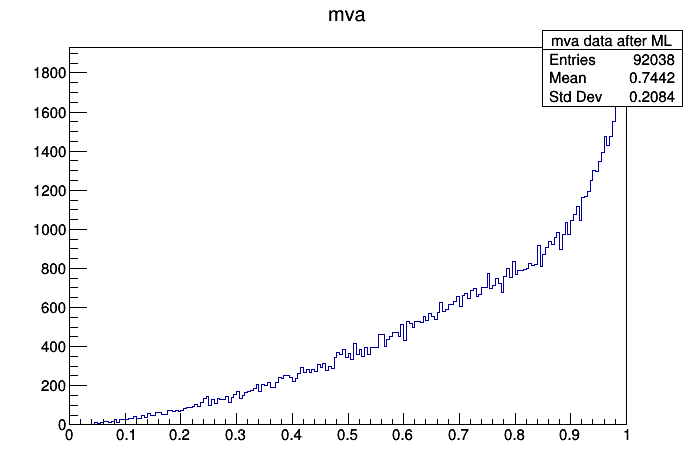

In [296]:
c = TCanvas("c1","c1")
histo2=TH1F("mva data after ML","mva", 200, 0, 1)
for i in range(0,len(simulato['prediction'])):
    if simulato['prediction'][i]==1:
        histo2.Fill(SIM_test['mva'][i])
histo2.Draw()
c.Draw()